In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import PolyCollection
from matplotlib.ticker import LogLocator
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.cm as cm

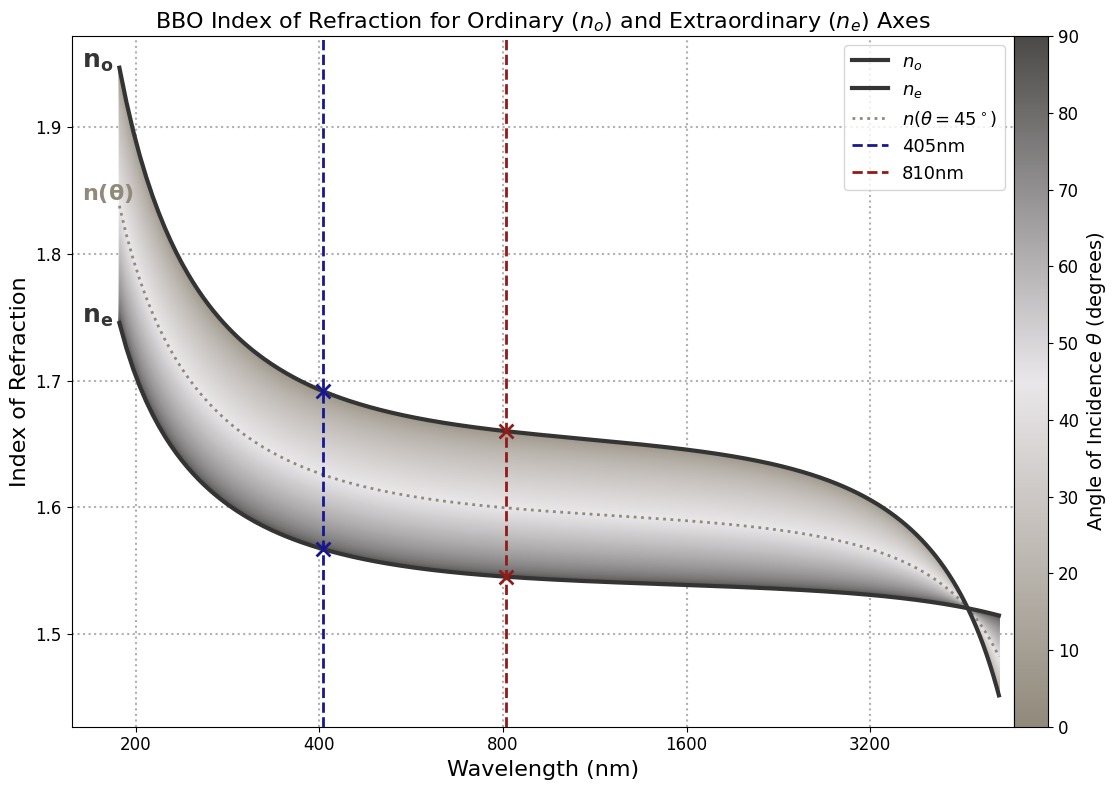

In [2]:

# Define the functions for the ordinary and extraordinary indices of refraction
def O_lambda(lambda_um):
    return np.sqrt((1 + 
            (0.90291 * lambda_um**2) / (lambda_um**2 - 0.003926) + 
            (0.83155 * lambda_um**2) / (lambda_um**2 - 0.018786) + 
            (0.76536 * lambda_um**2) / (lambda_um**2 - 60.01)))

def E_lambda(lambda_um):
    return np.sqrt((1 + 
            (1.151075 * lambda_um**2) / (lambda_um**2 - 0.007142) + 
            (0.21803 * lambda_um**2) / (lambda_um**2 - 0.02259) + 
            (0.656 * lambda_um**2) / (lambda_um**2 - 263)))

# Wavelength range (0.188 um to 5.2 um)
lambda_um = np.linspace(0.188, 5.2, 1000)

# Calculate indices of refraction for both axes
O_values = O_lambda(lambda_um)
E_values = E_lambda(lambda_um)

# Highlight points at 405 nm (0.405 um) and 810 nm (0.810 um)
highlight_wavelengths = np.array([0.405, 0.810])
O_highlights = O_lambda(highlight_wavelengths)
E_highlights = E_lambda(highlight_wavelengths)

# Convert the wavelength axis to nanometers for labeling
lambda_um_in_nm = lambda_um * 1000  # Convert micrometers to nanometers

# Custom RGB colors for the lines
color_n_e = "#343434"
color_n_o = color_n_e #"#ada69b"
color_n_theta = "#918a7b"
color_405nm = "#181792"  # blue
color_810nm = "#921a17"  # red 

# ====== Custom Colormap Definition ======
# Define your custom colors in hexadecimal
start_color = "#918a7b"
middle_color = "#eae7eaff"
end_color = "#4b4a48"

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_gradient",
    [start_color, middle_color, end_color],
    N=300  # Number of discrete colors in the colormap
)
# ====== End of Custom Colormap Definition ======

# Create the figure and axis using subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ordinary and extraordinary indices
ax.plot(lambda_um, O_values, color=color_n_o, linewidth=3, label='$n_o$', zorder=3)
ax.plot(lambda_um, E_values, color=color_n_e, linewidth=3, label='$n_e$', zorder=3)

# Highlight specific wavelengths (405 nm and 810 nm) with cross markers matching the vertical line colors
ax.scatter(0.405, O_highlights[0], color=color_405nm, s=100, marker='x', linewidths=2, zorder=4)
ax.scatter(0.810, O_highlights[1], color=color_810nm, s=100, marker='x', linewidths=2, zorder=4)
ax.scatter(0.405, E_highlights[0], color=color_405nm, s=100, marker='x', linewidths=2, zorder=4)
ax.scatter(0.810, E_highlights[1], color=color_810nm, s=100, marker='x', linewidths=2, zorder=4)


# Set x-axis to logarithmic scale with base 2
ax.set_xscale('log', base=2)

# Customize x-axis ticks for nanometer labels
wavelength_ticks_nm = np.array([200, 400, 800, 1600, 3200, 6400])
ax.set_xticks(wavelength_ticks_nm / 1000)  # Convert nm back to um for the tick placement
ax.set_xticklabels(wavelength_ticks_nm)
ax.tick_params(axis='both', which='major', labelsize=12)

# Labels and title
ax.set_title('BBO Index of Refraction for Ordinary ($n_o$) and Extraordinary ($n_e$) Axes', fontsize=16)
ax.set_xlabel('Wavelength (nm)', fontsize=16)
ax.set_ylabel('Index of Refraction', fontsize=16)
ax.legend(fontsize=13, loc='upper right')

# Annotate n_o and n_e
x_position_o = 0.188
x_position_e = 0.188
ax.text(x_position_o - 0.025, O_lambda(x_position_o), r'$\mathbf{n_o}$', fontsize=18, color=color_n_o)
ax.text(x_position_e - 0.025, E_lambda(x_position_e), r'$\mathbf{n_e}$', fontsize=18, color=color_n_e)

# ====== Color Gradient ======

# Define angle range from 0 to 90 degrees
theta_deg = np.linspace(0, 90, 300)  # 300 points for smooth gradient
theta_rad = np.deg2rad(theta_deg)

# Compute the interpolated index of refraction for each theta and wavelength
# Shape: (len(theta_rad), len(lambda_um))
n_theta = ( (np.cos(theta_rad)[:, np.newaxis]**2) / (O_values[np.newaxis, :]**2) + 
            (np.sin(theta_rad)[:, np.newaxis]**2) / (E_values[np.newaxis, :]**2) )**(-0.5)

# Create a colormap
cmap = custom_cmap  
norm = Normalize(vmin=0, vmax=90)  # Normalize between 0 and 90 degrees

# Plot multiple curves for different theta values
for i, theta in enumerate(theta_deg):
    ax.plot(lambda_um, n_theta[i], color=cmap(norm(theta)), linewidth=1, zorder=2)

# Create a ScalarMappable and associate it with the colormap and normalization
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(theta_deg)  # Associate the array with the ScalarMappable

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, pad=0.0)
cbar.set_label(r'Angle of Incidence $\theta$ (degrees)', fontsize=14)
cbar.set_ticks(np.linspace(0, 90, 10))
cbar.ax.tick_params(labelsize=12)

# ====== Additional Line for n(theta) ======
# Define the specific angle theta (e.g., 45 degrees)
theta_specific_deg = 45
theta_specific_rad = np.deg2rad(theta_specific_deg)

# Compute the interpolated index of refraction for theta_specific
n_theta_specific = ( (np.cos(theta_specific_rad)**2 / O_values**2) + 
                     (np.sin(theta_specific_rad)**2 / E_values**2) )**(-0.5)

# Choose a wavelength to place the label (e.g., 4.5 um)
lambda_label = 0.18  # in micrometers
# Find the closest index to the chosen wavelength
index_label = np.argmin(np.abs(lambda_um - lambda_label))
# Get the corresponding refractive index
n_label = n_theta_specific[index_label]

# Add the text label near the chosen point
ax.text(lambda_um[index_label] - 0.025,  n_label + 0.01, 
        r'$\mathbf{n(\theta)}$', 
        fontsize=16, 
        color=color_n_theta, 
        ha='left', 
        va='center',)

# Plot the specific n(theta) line
ax.plot(lambda_um, n_theta_specific, color=color_n_theta, linewidth=2, linestyle=':', label=r'$n(\theta=45^\circ)$')

# ====== End of Additional Line ======

# Add vertical lines at 405 nm and 810 nm with corresponding colors
ax.axvline(x=0.405, color=color_405nm, linestyle='--', label='405nm', linewidth=2, zorder=3)
ax.axvline(x=0.810, color=color_810nm, linestyle='--', label='810nm', linewidth=2, zorder=3)

# Update the legend to include the new line
ax.legend(fontsize=13, loc='upper right')
# Optionally, enhance grid
ax.grid(True, which="both", ls=":", linewidth=1.5)
plt.xlim((0.157, 5.5))
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


 # Time delay adjustment

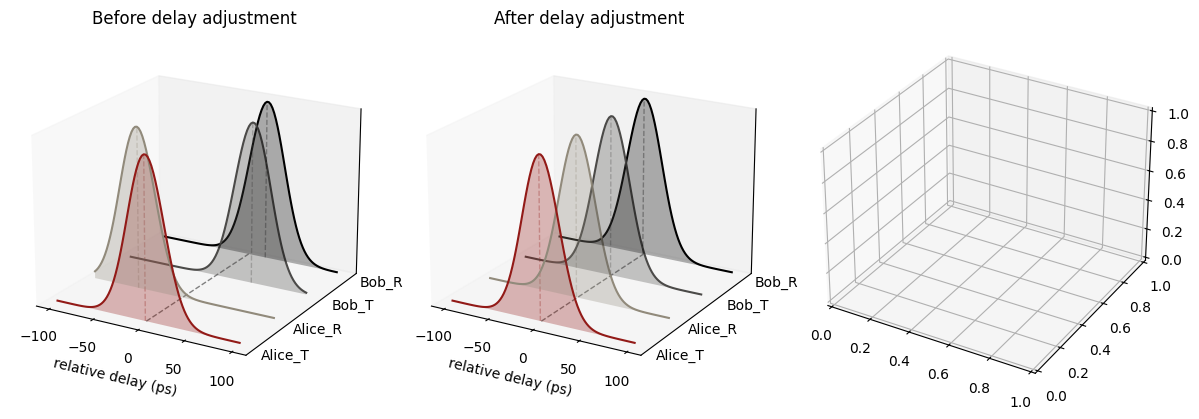

In [99]:
# Generate synthetic signals (Gaussian-like peaks)
def generate_signal(time, shift):
    return np.exp(-((time/100 - shift) ** 2) / (2 * 0.2 ** 2))

# Time axis (ps)
time = np.linspace(-100, 100, 100)

# Channel labels
channels = ['Alice_T', 'Alice_R', 'Bob_T', 'Bob_R']
# Custom RGB colors for the lines
color_n_e = "#343434"
color_n_o = color_n_e #"#ada69b"
color_n_theta = "#918a7b"
color_405nm = "#181792"  # blue
color_810nm = "#921a17"  # red 

# ====== Custom Colormap Definition ======
# Define your custom colors in hexadecimal
start_color = "#918a7b"
middle_color = "#eae7eaff"
end_color = "#4b4a48"

colors = [color_810nm, start_color, end_color, 'black']
#colors = ['dodgerblue', 'black', 'darkblue', 'firebrick']

# Time shifts for "Before delay adjustment"
shifts_before = [0 , -0.5, 0.40, 0.20]

# Time shifts for "After delay adjustment" (aligned)
shifts_after = [0, 0, 0, 0]

fig, axes = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={'projection': '3d'})

titles = ["Before delay adjustment", "After delay adjustment"]
shifts = [shifts_before, shifts_after]

for ax, title, shift_set in zip(axes, titles, shifts):
    ax.set_title(title, pad=0)

    for i, (channel, color, shift) in enumerate(zip(channels, colors, shift_set)):
        signal = generate_signal(time, shift)
        ax.plot(time, np.full_like(time, i), signal, color=color, zorder=4-i)

        # Create vertices for filling (connecting signal to z=0)
        verts = [list(zip(time, signal)) + list(zip(time[::-1], np.zeros_like(time)))]
        poly = PolyCollection(verts, facecolor=color, alpha=0.3)
        ax.add_collection3d(poly, zs=i, zdir='y')

        # Find peak index and corresponding time
        peak_idx = np.argmax(signal)
        peak_time = time[peak_idx]
        peak_value = signal[peak_idx]

        # Plot vertical dotted line from peak to z=0
        ax.plot([peak_time, peak_time], [i, i], [0, peak_value], linestyle="--", color=color, linewidth=1, alpha=0.3)

    # Formatting
    ax.set_xlabel("relative delay (ps)")
    ax.set_zticks([])            # Remove z-axis ticks
    ax.set_zticklabels([])       # Remove z-axis tick labels
    ax.zaxis.label.set_visible(False)  # Remove z-axis label
    ax.set_yticks(range(len(channels)))
    ax.set_yticklabels(channels)
    #ax.set_yticklabels(channels, verticalalignment='center', horizontalalignment='right')
    # Hide default labels
    ax.set_yticks([])
    ax.set_yticklabels([])

    # Manually place text labels
    for i, label in enumerate(channels):
        ax.text(172, i + 0.0, 0, label, fontsize=10, color='black', ha='right')
        
    ax.grid(False)
    ax.view_init(elev=20, azim=-60)
    ax.plot([0, 0], [0, len(channels)-1], [0, 0], '--', linewidth=1, color='gray')  # Dotted black line

plt.tight_layout()
plt.savefig("delay_adjustment_uncropped.pdf", dpi=300)
plt.show()
